In [1]:
# Importing the ecessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score
%matplotlib inline

In [2]:
# Imporitng the dataset
iris = pd.read_csv(r'C:\Users\Laptop\Downloads\Data Analytics\VS code\Datasets\Iris.csv',
                   index_col='Id')

In [3]:
iris.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<Figure size 1500x1000 with 0 Axes>

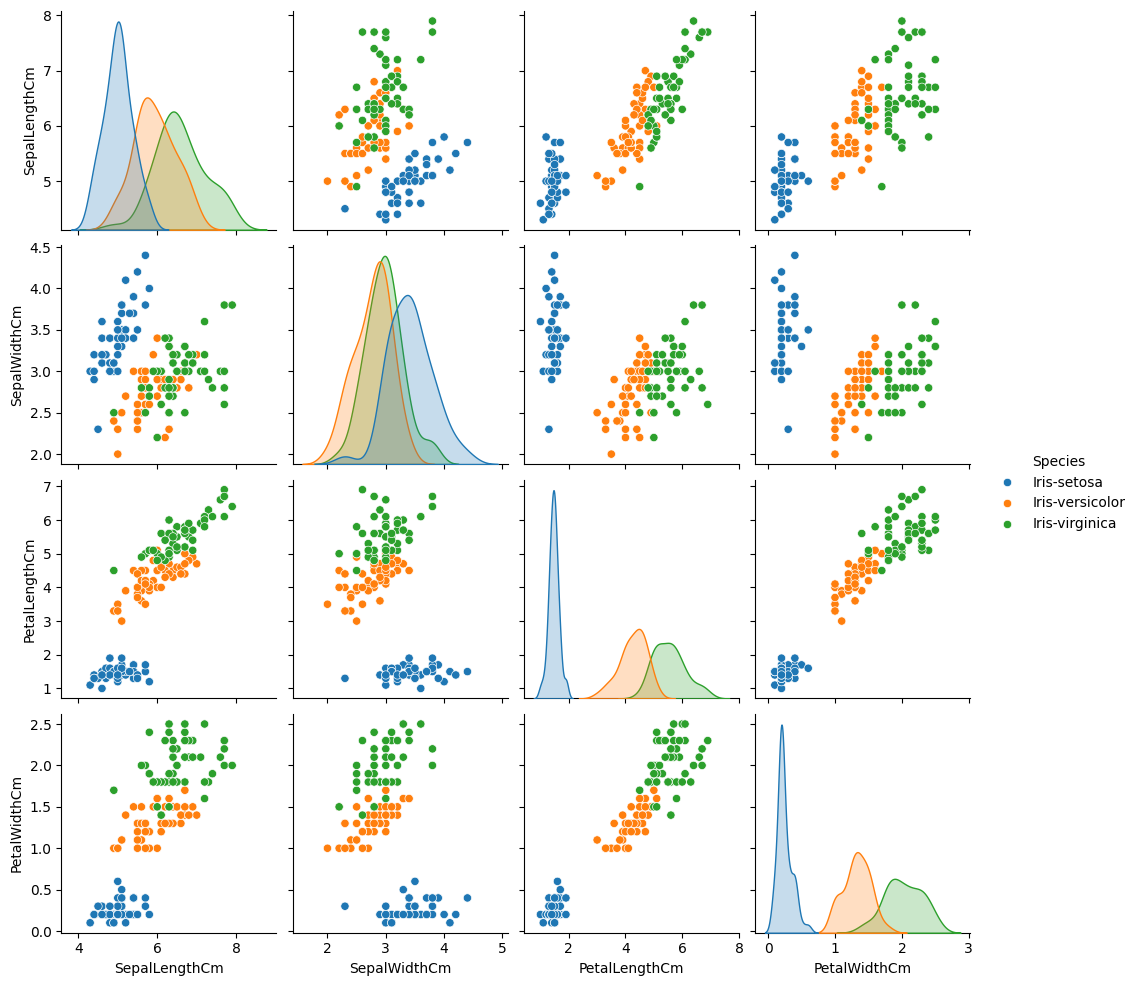

In [5]:
# Plotting the dataset for visualization
fig = plt.figure(figsize=(15,10))
sns.pairplot(iris, hue='Species')

Most of the overlap is comming between the iris-vesicolor and iris-virginica while iris-setosa is not overlapping with any other species.

In [6]:
# creating features and target datasets
x = iris.drop('Species', axis=1)
y = iris.Species

In [7]:
# Scaling the features
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)
scaled_x = pd.DataFrame(scaled_x)
scaled_x.head()

,0,1,2,3
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


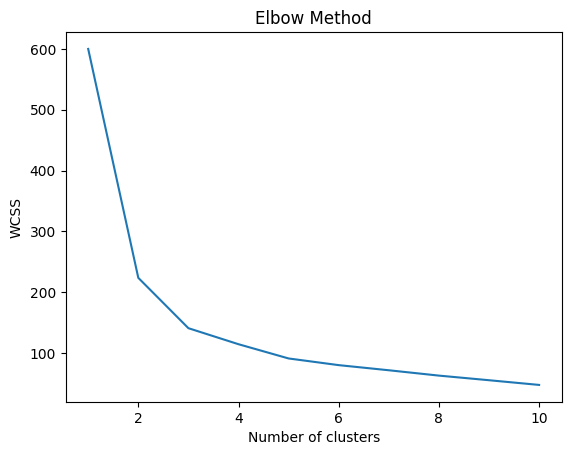

In [8]:
# Finding the best k value for the k-means clustering
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(scaled_x)
    wcss.append(kmeans.inertia_)

#plotting the results
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

Here we used the elbow method. It helps us to find the optimal k value for the k-means clustering.  
According to the role where we see the elbow there is the optimal value for k. So in our case it is 3.

We will also check another evaluation method called silhouette analysis.  
According to the rule where we see the highes peak in the graph, it is the optimal k value.

c:\Users\Laptop\Downloads\Data Analytics\VS code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


c:\Users\Laptop\Downloads\Data Analytics\VS code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Laptop\Downloads\Data Analytics\VS code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Laptop\Downloads\Data Analytics\VS code\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Laptop\Downloads\Data Analytics\VS code\.venv\Lib\site-packages\sklearn\clus

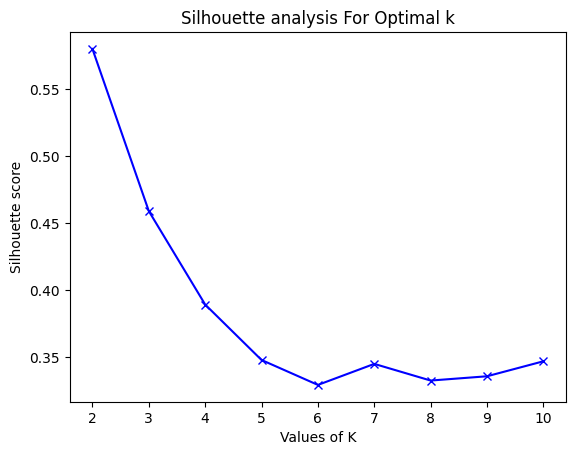

In [9]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
silhouette_avg = []
for num_clusters in range_n_clusters:
 
 # initialise kmeans
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(scaled_x)
 cluster_labels = kmeans.labels_
 
 # silhouette score
 silhouette_avg.append(silhouette_score(scaled_x, cluster_labels))
 
plt.plot(range_n_clusters,silhouette_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

We can see the the highes values for silhouette score in the graph. It is 2.  
But from the pattern observed in the visualization of our data above we can see that the optimal value for k should be 3 

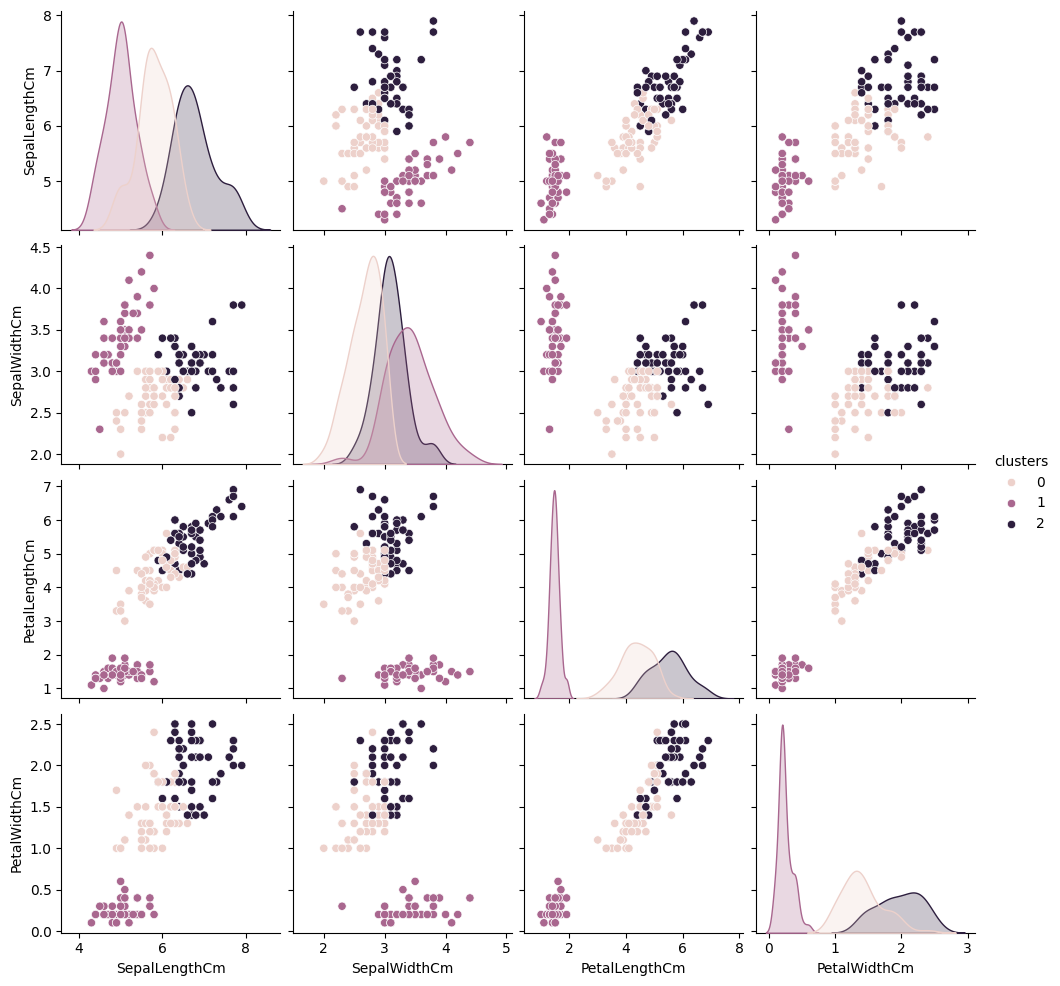

In [10]:
# Creating the k-means model with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=1000, n_init=100, random_state=0)
clusters = kmeans.fit(scaled_x)
x_kmeans = x.copy()
x_kmeans['clusters'] = clusters.labels_
sns.pairplot(x_kmeans, hue='clusters')

We can see that the model has captured the clusters in the dataset very well.

Lets try another model called Agglomerative Clustering. It uses hierarchical clustering.

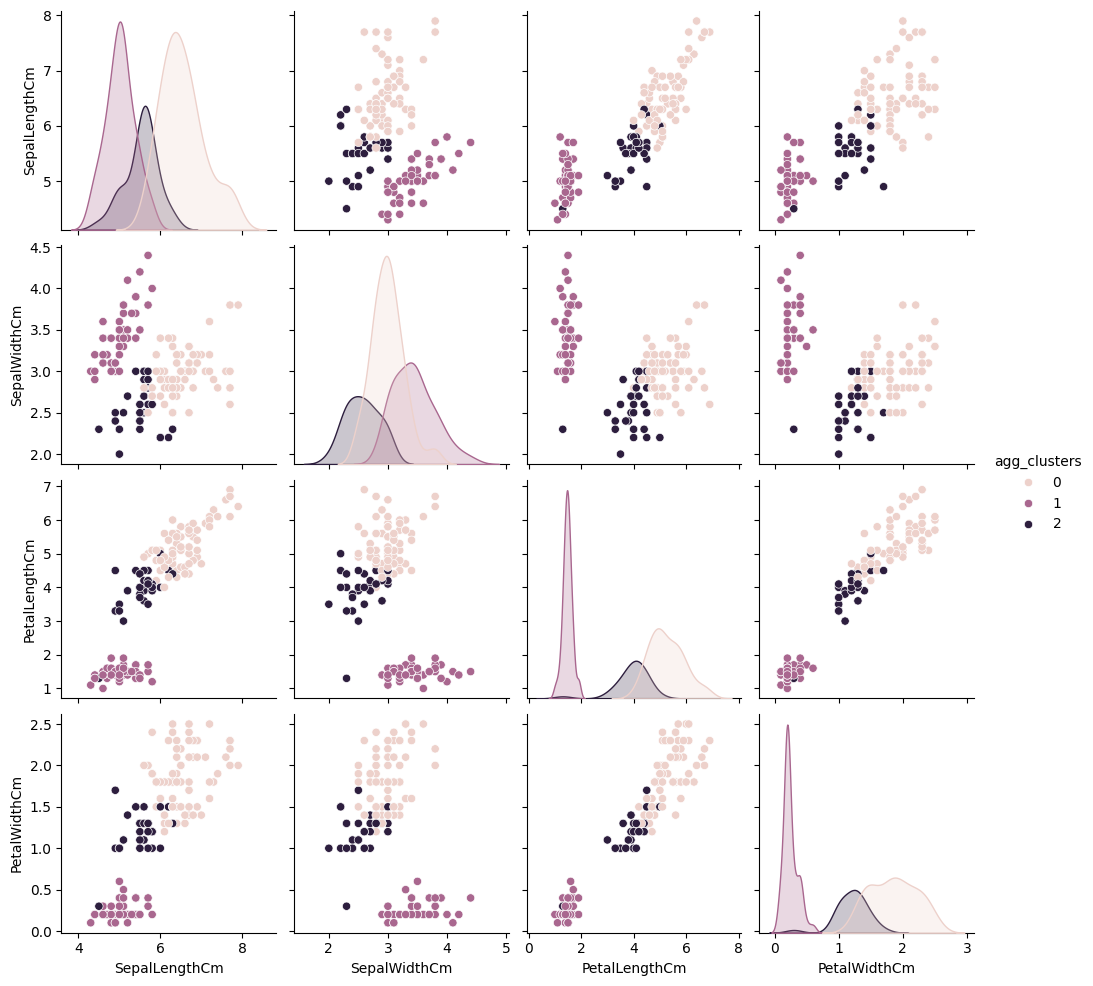

In [11]:
# Using Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
agg_cluster.fit(scaled_x)
x_agg = x.copy()
x_agg['agg_clusters'] = agg_cluster.labels_

# Visualizing the clusters
sns.pairplot(x_agg, hue='agg_clusters')

We can see that k-means performed better than Agglomerative Clustering.

Let plot a dendrogram.  
A dendrogram is a diagram that shows the hierarchical relationship between objects. It is most commonly created as an output from hierarchical clustering. The main use of a dendrogram is to work out the best way to allocate objects to clusters.

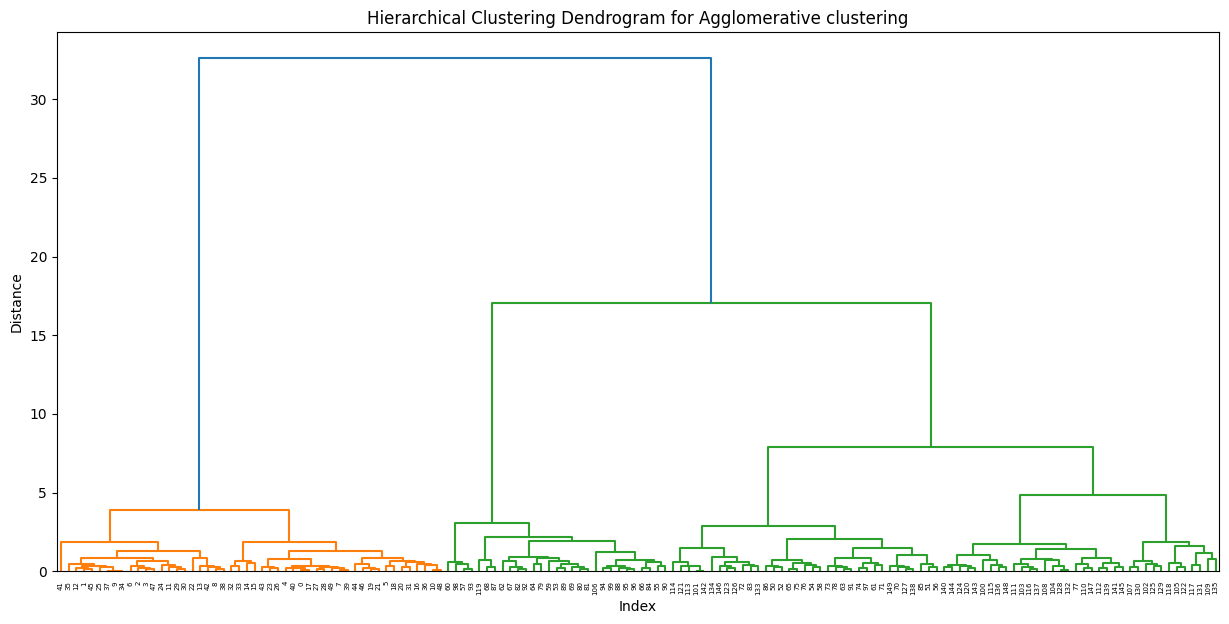

In [12]:
Z_agg = linkage(x_agg, method='ward')

# Plotting the dendrogram for Agglomerative
fig = plt.figure(figsize=(15,7))
dendrogram(Z_agg)
plt.title('Hierarchical Clustering Dendrogram for Agglomerative clustering')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

The key to interpreting a dendrogram is to focus on the height at which any two objects are joined together.  
In our case we can see that the 3 branches are optimal as the distance of branches after them is very short

This concludes our project.  
We used k-means clustering and Agglomerative Clustering.  
Found that optimal value for k is 3 using elbow method.  
And plotted dendrogram for Agglomerative Clustering to see the hirarchical clustering.  

Untill next time  
Allah Hafiz